In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3

%load_ext sql
%matplotlib inline

The sql extension is already loaded. To reload it, use:
  %reload_ext sql


In [ ]:
pip install jupyterlab-sql

#### Informações do Dataframe

- id: Identificador único para cada registro.
- default: Indica se o cliente possui algum histórico de default (inadimplência).
- idade: Idade do cliente.
- sexo: Sexo do cliente (M para masculino, F para feminino).
- dependentes: Número de dependentes do cliente.
- escolaridade: Nível de escolaridade do cliente.
- estado_civil: Estado civil do cliente.
- salario_anual: Salário anual do cliente.
- tipo_cartao: Tipo de cartão de crédito do cliente.
- meses_de_relacionamento: Número de meses de relacionamento com a instituição financeira.
- qtd_produtos: Quantidade de produtos financeiros do cliente.
- iteracoes_12m: Número de interações (contatos) com a instituição financeira nos últimos 12 meses.
- meses_inativo_12m: Número de meses de inatividade nos últimos 12 meses.
- limite_credito: Limite de crédito do cliente.
- valor_transacoes_12m: Valor total das transações nos últimos 12 meses.
- qtd_transacoes_12m: Quantidade total de transações nos últimos 12 meses.

#### Informações da pesquisa

- Análise de dados com Pandas
- Visualização de dados com Matplotlib e Seaborn
- Consulta e exploração de dados utilizando SQL
- Story-telling e Insights passo a passo sobre a pesquisa

In [87]:
## Início : Rodar o dataframe em uma variável com nosso arquivo em formato CSV;

df = pd.read_csv('./Arquivo.csv')
df

,id,default,idade,sexo,dependentes,escolaridade,estado_civil,salario_anual,tipo_cartao,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
0,768805383,0,45,M,3,ensino medio,casado,$60K - $80K,blue,39,5,3,1,"12.691,51","1.144,90",42
1,818770008,0,49,F,5,mestrado,solteiro,menos que $40K,blue,44,6,2,1,"8.256,96","1.291,45",33
2,713982108,0,51,M,3,mestrado,casado,$80K - $120K,blue,36,4,0,1,"3.418,56","1.887,72",20
3,769911858,0,40,F,4,ensino medio,na,menos que $40K,blue,34,3,1,4,"3.313,03","1.171,56",20
4,709106358,0,40,M,3,sem educacao formal,casado,$60K - $80K,blue,21,5,0,1,"4.716,22","816,08",28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,0,50,M,2,mestrado,solteiro,$40K - $60K,blue,40,3,3,2,"4.003,91","15.476,26",117
10123,710638233,1,41,M,2,na,divorciado,$40K - $60K,blue,25,4,3,2,"4.277,04","8.764,88",69
10124,716506083,1,44,F,1,ensino medio,casado,menos que $40K,blue,36,5,4,3,"5.409,16","10.291,78",60
10125,717406983,1,30,M,2,mestrado,na,$40K - $60K,blue,36,4,3,3,"5.281,84","8.395,62",62


## Análise dos dados com Pandas

In [88]:
## Verificando os tipos de dados nas colunas:.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   id                       10127 non-null  int64 
 1   default                  10127 non-null  int64 
 2   idade                    10127 non-null  int64 
 3   sexo                     10127 non-null  object
 4   dependentes              10127 non-null  int64 
 5   escolaridade             10127 non-null  object
 6   estado_civil             10127 non-null  object
 7   salario_anual            10127 non-null  object
 8   tipo_cartao              10127 non-null  object
 9   meses_de_relacionamento  10127 non-null  int64 
 10  qtd_produtos             10127 non-null  int64 
 11  iteracoes_12m            10127 non-null  int64 
 12  meses_inativo_12m        10127 non-null  int64 
 13  limite_credito           10127 non-null  object
 14  valor_transacoes_12m     10127 non-nul

In [89]:
# Removendo pontos dos valores e substituindo vírgulas por pontos decimais
df['limite_credito'] = df['limite_credito'].str.replace('.', '').str.replace(',', '.').astype(float)
df['valor_transacoes_12m'] = df['valor_transacoes_12m'].str.replace('.', '').str.replace(',', '.').astype(float)

# Verificando o tipo dos dados após a conversão
print(df.dtypes)

id                           int64
default                      int64
idade                        int64
sexo                        object
dependentes                  int64
escolaridade                object
estado_civil                object
salario_anual               object
tipo_cartao                 object
meses_de_relacionamento      int64
qtd_produtos                 int64
iteracoes_12m                int64
meses_inativo_12m            int64
limite_credito             float64
valor_transacoes_12m       float64
qtd_transacoes_12m           int64
dtype: object


In [21]:
## Verificando se existe valores nulos ou dados faltantes no dataframe

df.isna().sum()

id                         0
default                    0
idade                      0
sexo                       0
dependentes                0
escolaridade               0
estado_civil               0
salario_anual              0
tipo_cartao                0
meses_de_relacionamento    0
qtd_produtos               0
iteracoes_12m              0
meses_inativo_12m          0
limite_credito             0
valor_transacoes_12m       0
qtd_transacoes_12m         0
dtype: int64

##### 1) Criando uma nova coluna, de nome 'Status' tendo como base os valores da coluna salário_anual, em seguida, farei uma relação desses dados com a coluna de idade dos clientes.

In [90]:
## Verificando também os dados contidos na coluna salário_anual

df['salario_anual'].value_counts()

salario_anual
menos que $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
na                1112
$120K +            727
Name: count, dtype: int64

In [91]:
## Criando uma nova coluna de nome status no df com base nos dados relacionais;

def status_soc (x):
    if x == 'menos que $40K':
        return 'Baixa renda'
    elif x == 'na':
        return 'Renda não regristrada'
    elif x == '$40K - $60K' or x == '$60K - $80K':
        return 'Renda média'
    else:
        return 'Renda alta'

df['Status'] = df['salario_anual'].apply(status_soc)
df['Status'].value_counts()

        

Status
Baixa renda              3561
Renda média              3192
Renda alta               2262
Renda não regristrada    1112
Name: count, dtype: int64

In [92]:
## Gerando uma relação entre a tabela de idade dos clientes e seu nível de renda;

df_renda_clientes = df.groupby('Status')['idade'].value_counts().reset_index().sort_values(by = 'count', ascending = False)
df_renda_clientes

,Status,idade,count
0,Baixa renda,44,180
1,Baixa renda,45,175
2,Baixa renda,49,169
3,Baixa renda,43,168
81,Renda média,45,167
...,...,...,...
42,Baixa renda,67,1
80,Renda alta,26,1
40,Baixa renda,70,1
41,Baixa renda,68,1


- Insight inicial
: Notou-se que pessoas de idade entre 40-49 anos são de grande maioria de baixa renda e estão mais presentes no dataframe.

##### 2) Analisando as variáveis categórias no dataframe, realizando conexões entre elas, e por fim gerando insights sobre os resultados.

In [93]:
## Verificando qual o grau de escolaridade dos homens e das mulheres;

tabela_pivo = df.pivot_table(index='sexo', columns='escolaridade', aggfunc='size')
tabela_pivo

escolaridade,doutorado,ensino medio,graduacao,mestrado,na,sem educacao formal
sexo,,,,,,
F,520,1028,532,1670,812,796
M,447,985,481,1458,707,691


##### 3) Analisando o status social dos clientes com mais de 2 dependentes

In [94]:
## Isolando a quantidade de clientes com mais de 2 dependentes em uma variável;
max_dependentes = df[df['dependentes'] > 2]

## gerando resultado com a tabela
max_dependentes.groupby('dependentes')['Status'].value_counts().to_frame()

count
dependentes Status                      
3           Baixa renda              896
            Renda média              872
            Renda alta               674
            Renda não regristrada    290
4           Baixa renda              535
            Renda média              491
            Renda alta               374
            Renda não regristrada    174
5           Renda média              149
            Baixa renda              148
            Renda alta                87
            Renda não regristrada     40

- Correlação entre dependentes e status financeiro: Clientes com mais dependentes tendem a estar mais concentrados na categoria de "Baixa renda" e menos na categoria de "Renda alta".

- Indicação de condições socioeconômicas: A distribuição dos status financeiros em relação ao número de dependentes sugere as condições econômicas enfrentadas por diferentes grupos de clientes, especialmente famílias maiores.

- Potencial para segmentação de mercado: Os dados indicam uma oportunidade para segmentar o mercado com base no número de dependentes e no status financeiro, permitindo estratégias de marketing e produtos mais direcionados.

- Oportunidades de marketing e comunicação: Compreender essa distribuição pode ajudar na criação de campanhas de marketing e comunicação mais eficazes, adaptadas às necessidades específicas de clientes com diferentes números de dependentes e status financeiro.

## Consulta e exploração utilizando SQL

In [72]:
## Utilizando o SQL para gerar algumas consultas;

from sqlalchemy import create_engine

# Conectando ao banco de dados SQLite
engine = create_engine('sqlite:///Arquivo.db')

# Salvando DataFrame como tabela SQLite
df.to_sql('Arquivo', engine, if_exists='replace', index=False)

# Verificando se a tabela foi criada corretamente
%sql sqlite:///Arquivo.db
%sql SELECT * FROM Arquivo LIMIT 5;

 * sqlite:///Arquivo.db
Done.


id,default,idade,sexo,dependentes,escolaridade,estado_civil,salario_anual,tipo_cartao,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
768805383,0,45,M,3,ensino medio,casado,$60K - $80K,blue,39,5,3,1,"12.691,51","1.144,90",42
818770008,0,49,F,5,mestrado,solteiro,menos que $40K,blue,44,6,2,1,"8.256,96","1.291,45",33
713982108,0,51,M,3,mestrado,casado,$80K - $120K,blue,36,4,0,1,"3.418,56","1.887,72",20
769911858,0,40,F,4,ensino medio,na,menos que $40K,blue,34,3,1,4,"3.313,03","1.171,56",20
709106358,0,40,M,3,sem educacao formal,casado,$60K - $80K,blue,21,5,0,1,"4.716,22","816,08",28


In [73]:
%%sql sqlite:///Arquivo.db

SELECT DISTINCT escolaridade FROM Arquivo;

Done.


escolaridade
ensino medio
mestrado
sem educacao formal
na
graduacao
doutorado


In [74]:
%%sql sqlite:///Arquivo.db

select max(limite_credito) as limite_credito, escolaridade, tipo_cartao, sexo from Arquivo
where escolaridade != 'na' and tipo_cartao != 'na'
group by escolaridade, tipo_cartao, sexo
order by limite_credito desc
limit 10


Done.


limite_credito,escolaridade,tipo_cartao,sexo
"9.995,38",mestrado,blue,F
"9.989,82",ensino medio,blue,F
"9.981,79",graduacao,blue,M
"9.974,74",mestrado,blue,M
"9.966,98",doutorado,blue,F
"9.964,79",ensino medio,blue,M
"9.959,50",doutorado,blue,M
"9.959,14",sem educacao formal,blue,M
"9.909,58",sem educacao formal,blue,F
"9.881,38",graduacao,blue,F


Com base nos dados apresentados, podemos observar que clientes com formação em "mestrado" ou "doutorado" tendem a ter os limites de crédito mais altos, independentemente do sexo. Além disso, parece não haver variação significativa nos limites de crédito com base no tipo de cartão entre os clientes listados, já que todos possuem um cartão "blue". Essas observações sugerem que a escolaridade pode ser um fator importante na determinação dos limites de crédito, enquanto o tipo de cartão pode ter menos impacto nessa variável.

In [79]:
%%sql sqlite:///Arquivo.db

select avg(qtd_produtos) as qts_produtos, avg(valor_transacoes_12m) as media_valor_transacoes, avg(limite_credito)
from Arquivo
where salario_anual != 'na'
group by sexo, salario_anual
order by avg(valor_transacoes_12m) desc


Done.


qts_produtos,media_valor_transacoes,avg(limite_credito)
3.778541953232462,22.949829436038513,19.71732599724887
3.8338088445078458,22.341507845934377,10.758770328102692
3.7809278350515463,21.86876932989689,6.309720360824748
3.8169381107491858,19.668415635179176,15.80988859934848
3.898916967509025,19.155072202166075,4.579357400722025
3.8169914738124238,14.991218635809991,3.6847993300852715
3.785009861932939,12.118846153846137,4.813692307692317


- A quantidade média de produtos adquiridos por transação varia de aproximadamente 3.78 a 3.90.
- O valor médio das transações varia de aproximadamente $12.12 a $22.95.
- O limite de crédito médio varia de aproximadamente $3.68 a $19.72.

In [83]:
%%sql sqlite:///Arquivo.db

SELECT sexo, 
       COUNT(*) AS total_registros,
       AVG(valor_transacoes_12m) AS media_valor_gasto
FROM Arquivo
GROUP BY sexo;


Done.


sexo,total_registros,media_valor_gasto
F,5358,13.960068682344147
M,4769,21.105725938351757


- Existem mais registros associados ao sexo feminino (5358) do que ao sexo masculino (4769).
- A média de valor gasto para o sexo masculino (21.11) é maior do que a média de valor gasto para o sexo feminino (13.96).
- Essa diferença na média de valor gasto entre os sexos pode indicar padrões de gastos diferentes entre homens e mulheres.

### Visualização dos dados

##### 1) Gerando uma visualização com a relação do tipo de cartão e limite de crédito dos clientes

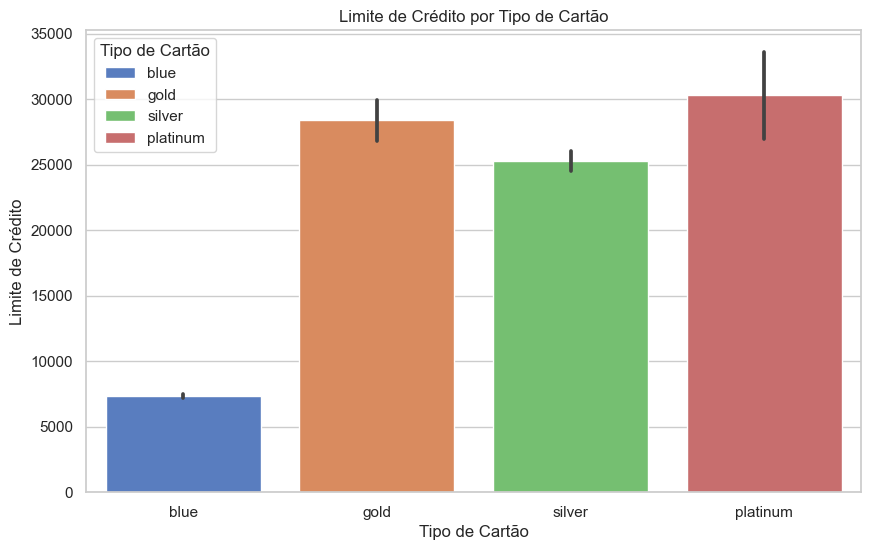

In [105]:
sns.set(style='whitegrid')

plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='tipo_cartao', y='limite_credito', hue='tipo_cartao', palette='muted', linewidth=1.0, dodge=False)
plt.xlabel('Tipo de Cartão')
plt.ylabel('Limite de Crédito')
plt.title('Limite de Crédito por Tipo de Cartão')
plt.legend(title='Tipo de Cartão', bbox_to_anchor=(0,1), loc='upper left')

##### 2) Relação dos valores de transação e Status social dos clientes

Text(0, 0.5, 'Valor de Transação')

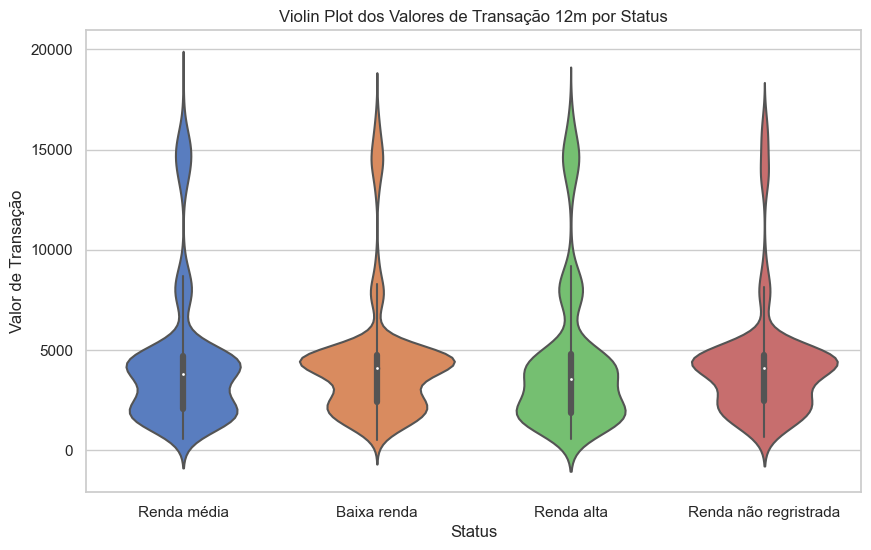

In [137]:
plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x='Status', y='valor_transacoes_12m', palette='muted')
plt.title('Violin Plot dos Valores de Transação 12m por Status')
plt.ylabel('Valor de Transação')


- Se a curva do violino está alta em uma determinada posição ao longo do eixo y, significa que há muitos dados com valores próximos a esse ponto. Quanto mais alta a curva em um determinado ponto, maior é a densidade de dados nessa região, indicando uma maior frequência de ocorrência de valores próximos a esse valor específico.


##### 3) Gerando um gráfico em Pizza para visualizar os dados de escolaridade dos clientes

(-1.0999980554317301, 1.09999763607476, -1.0999971076774757, 1.099998164673918)

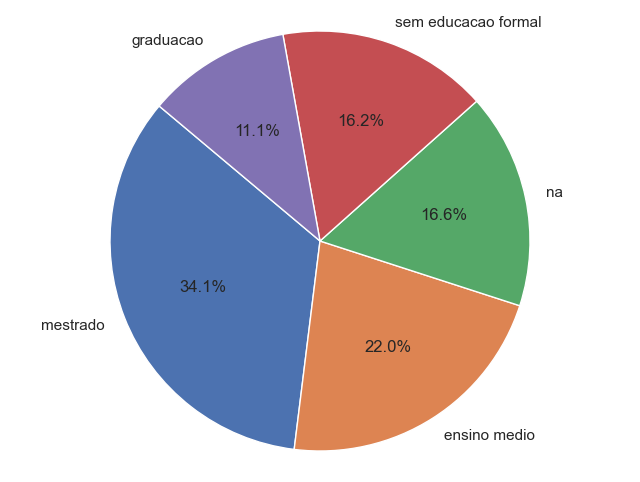

In [147]:
plt.figure(figsize=(8, 6))
plt.pie(contagem_escolaridade, labels=contagem_escolaridade.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')

### Conclusão:.

##### Com base nos dados extraídos do dataframe até aqui, podemos tirar os seguintes insights:

- Distribuição de escolaridade: A maioria dos clientes possui formação em nível médio ou superior, com uma proporção relativamente menor de clientes com educação sem formação formal.

- Distribuição de gênero: A distribuição de gênero dos clientes parece estar equilibrada, com uma proporção quase igual de clientes do sexo masculino e feminino.

- Distribuição de transações por tipo de cartão: A maioria das transações parece ser realizada com o cartão "blue", embora haja uma presença significativa de outros tipos de cartão.

- Distribuição de limites de crédito: Os limites de crédito variam bastante entre os clientes, com uma distribuição aparentemente normal, mas com algumas observações atípicas.

- Relação entre a escolaridade e o limite de crédito: Pode haver uma relação entre o nível de escolaridade e o limite de crédito, com clientes com níveis mais altos de escolaridade tendo limites de crédito potencialmente maiores.

- Distribuição de idade: A idade dos clientes parece variar, com uma distribuição que pode ser analisada para entender melhor o perfil demográfico dos clientes.